In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import sys
sys.path.append('../complete_run/')
from utils.seq import DHS_COLORS, CANONICAL_ORDER, COMPONENT_CLASS_NAMES

In [2]:
def get_component_name(component):
    idx = np.where(CANONICAL_ORDER == component + 1)[0][0]
    return COMPONENT_CLASS_NAMES[idx]

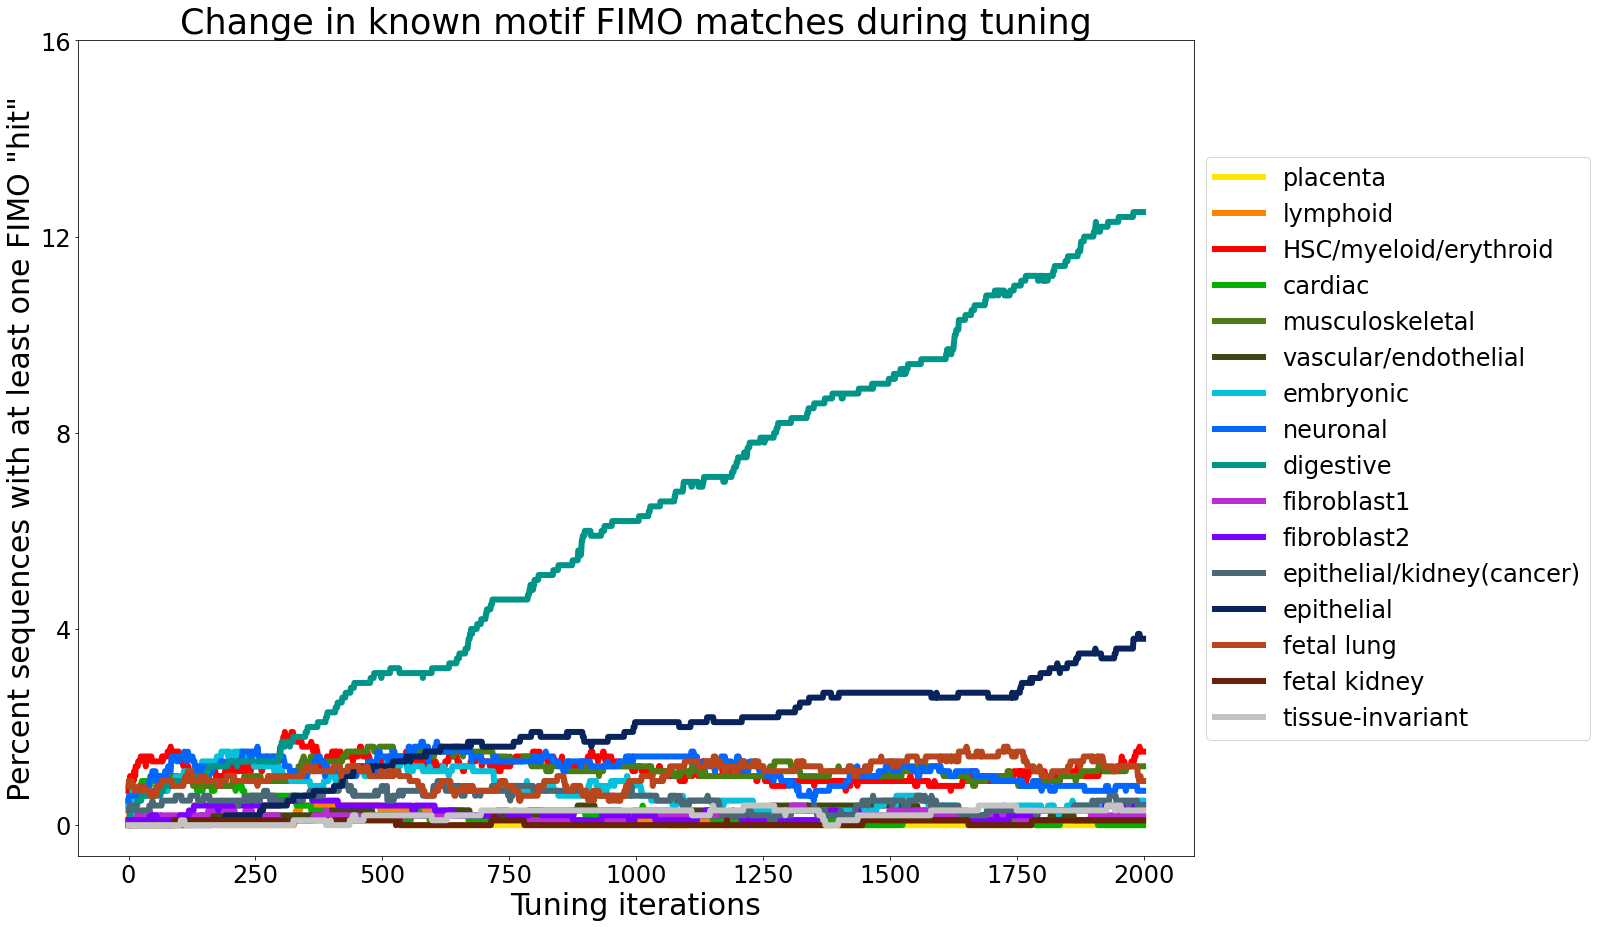

In [85]:
TOTAL_SEQS = 1000

plt.figure(figsize=(20, 15))

for c in CANONICAL_ORDER - 1:
    hits_df = pd.read_csv(f'../tuning/fimo/{c}/hits.txt', sep='\t', header=None)
    hits_df.columns = ['iter', 'hits']
    hits_df.iter = np.array([int(x[:-6]) for x in hits_df.iter])
    hits_df = hits_df.sort_values('iter').reset_index(drop=True)
    
    plt.plot(hits_df.iter, (hits_df.hits / TOTAL_SEQS) * 100, linewidth=6, c=DHS_COLORS[c], label=get_component_name(c))
    
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(range(0, 20, 4), fontsize=24)
plt.xlabel('Tuning iterations', fontsize=30)
plt.ylabel('Percent sequences with at least one FIMO "hit"', fontsize=30)
plt.title('Change in known motif FIMO matches during tuning', fontsize=35)

plt.savefig('../figures/fimo_hits_during_tuning_deep_PB20200612.png', bbox_extra_artists=(lgd,), bbox_inches='tight')



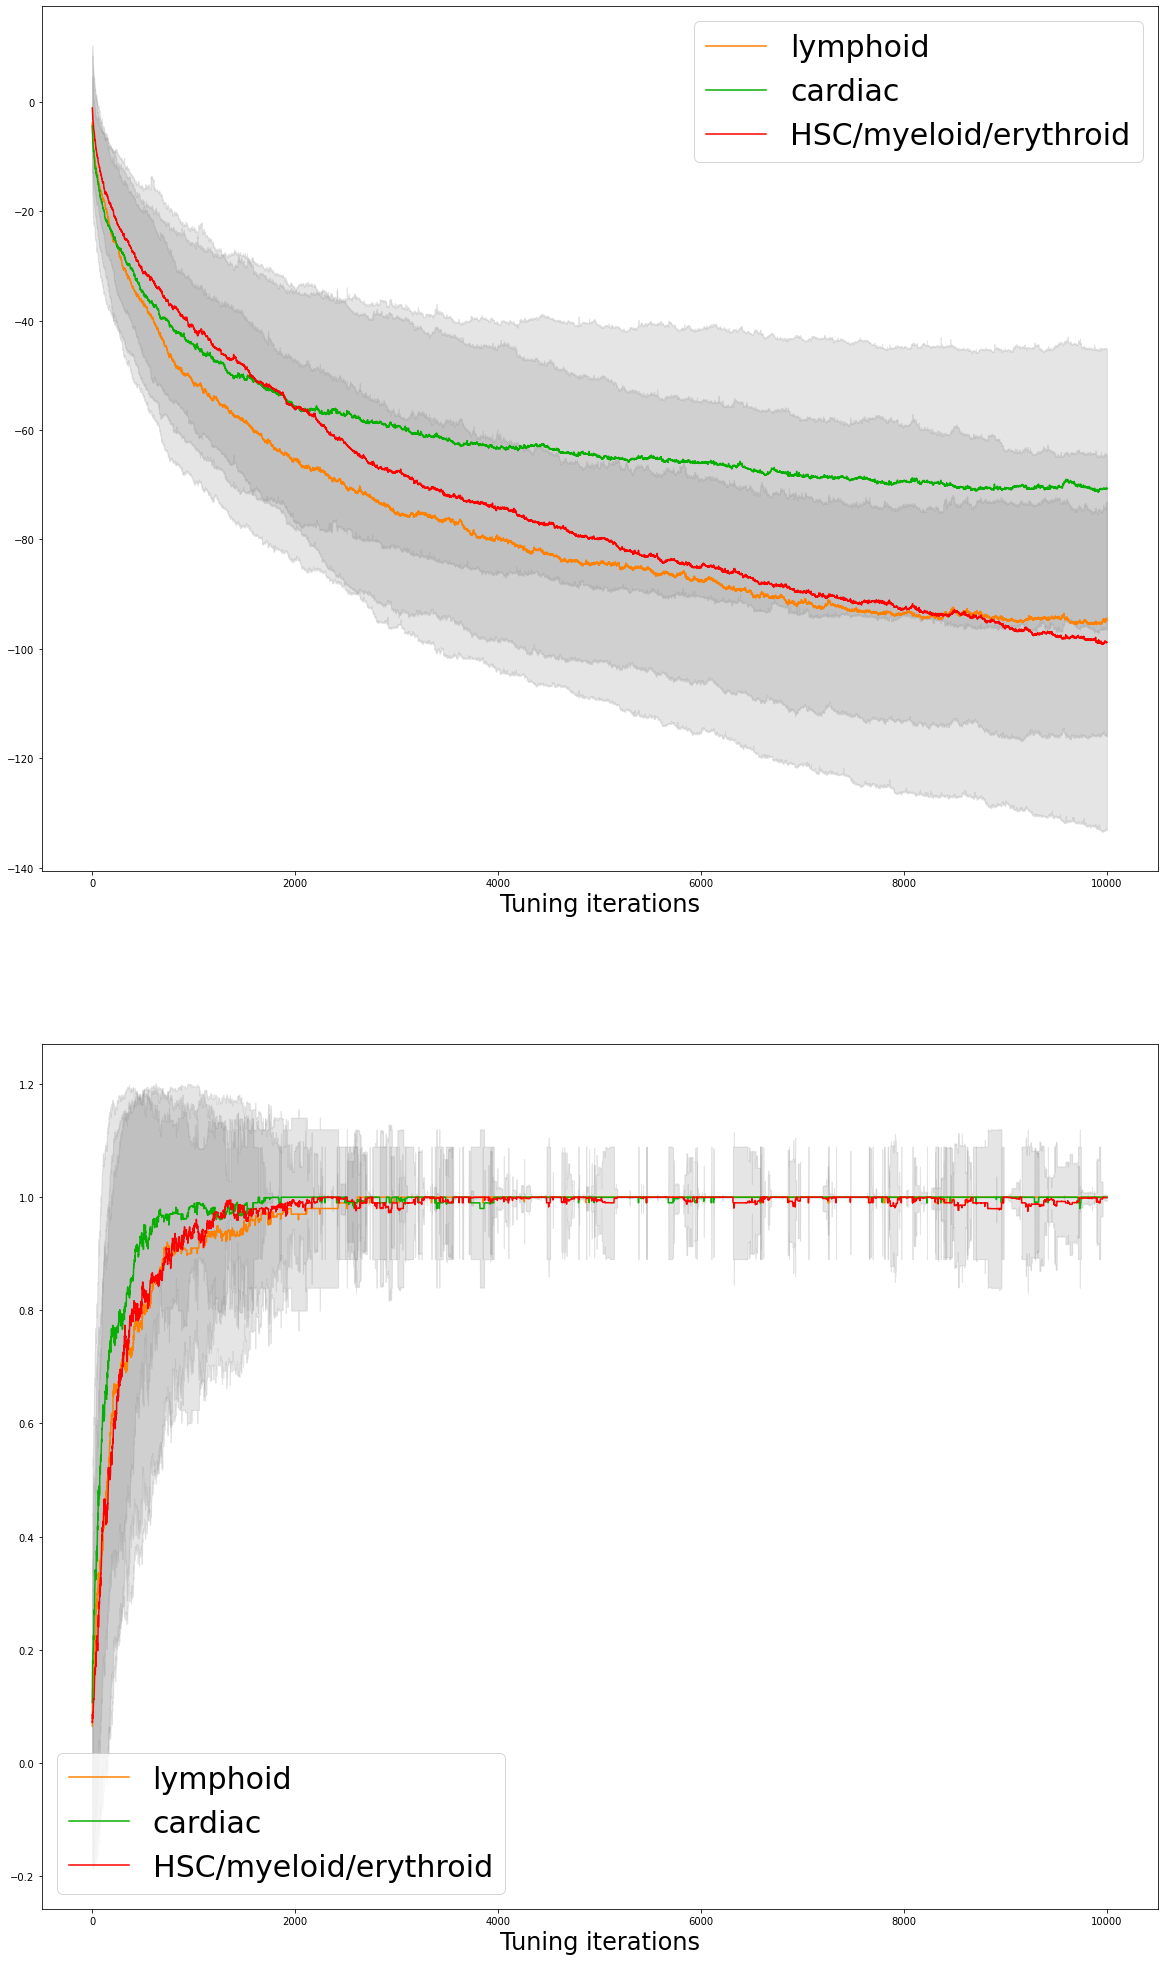

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(20, 35))

for component in [4, 8, 14]:
    history = {
        'loss': np.zeros((100, 10000)),
        'softmax': np.zeros((100, 10000)),
    }

    for i, label in enumerate(['loss', 'softmax']):
        for j in range(100):
            path = f'../tuning/optimization_analysis/{component}/{label}/{j}.txt'
            history[label][j] = np.loadtxt(path)
            
        values = history[label]
        means = np.mean(values, axis=0)
        stds = np.std(values, axis=0)
        
        ax[i].plot(np.arange(10000), means, c=DHS_COLORS[component], label=get_component_name(component))
        ax[i].fill_between(np.arange(10000), means - stds, means + stds, color='Gray', alpha=0.2)
        ax[i].legend(fontsize=30)
        
        ax[i].set_xlabel('Tuning iterations', fontsize=24)
        
ax[0].set_title('Pre-softmax layer loss over the tuning process', fontsize=30)
ax[0].set_ylabel('Pre-softmax layer node value', fontsize=24)
ax[1].set_title('Softmax prediction probability over the tuning process', fontsize=30)
ax[1].set_ylabel('Softmax layer prediction probability', fontsize=24)

In [38]:
plt.figure(figsize=(20, 15))
softmaxes = np.zeros((100, 10000))
for i in range(100):
    softmaxes[i] = np.loadtxt(f'../tuning/optimization_analysis/{component}/softmax/{i}.txt')

<Figure size 1440x1080 with 0 Axes>

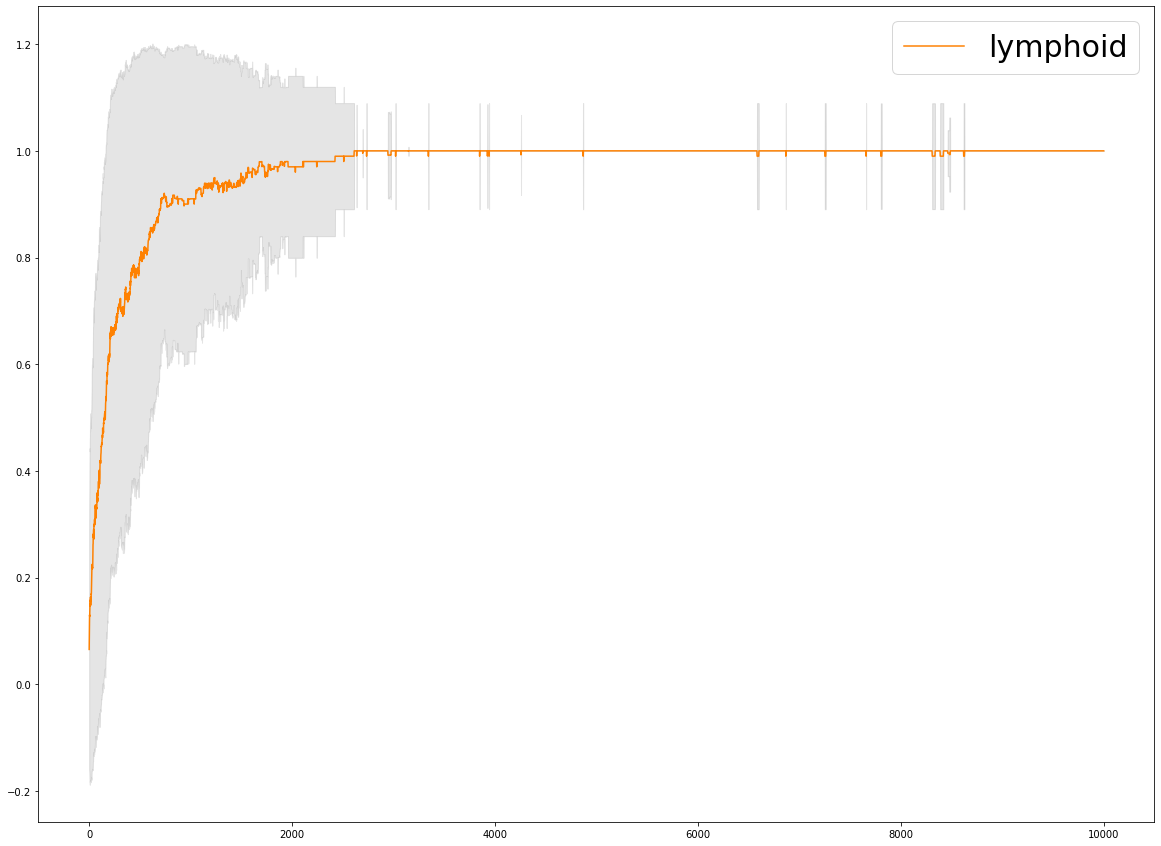

In [39]:
mean_softmax = np.mean(softmaxes, axis=0)
std_softmax = np.std(softmaxes, axis=0)

plt.figure(figsize=(20, 15))
plt.plot(np.arange(10000), mean_softmax, c=DHS_COLORS[component], label=get_component_name(component))
plt.fill_between(np.arange(10000), mean_softmax - std_softmax, mean_softmax + std_softmax, color='Gray', alpha=0.2)
plt.legend(fontsize=30)

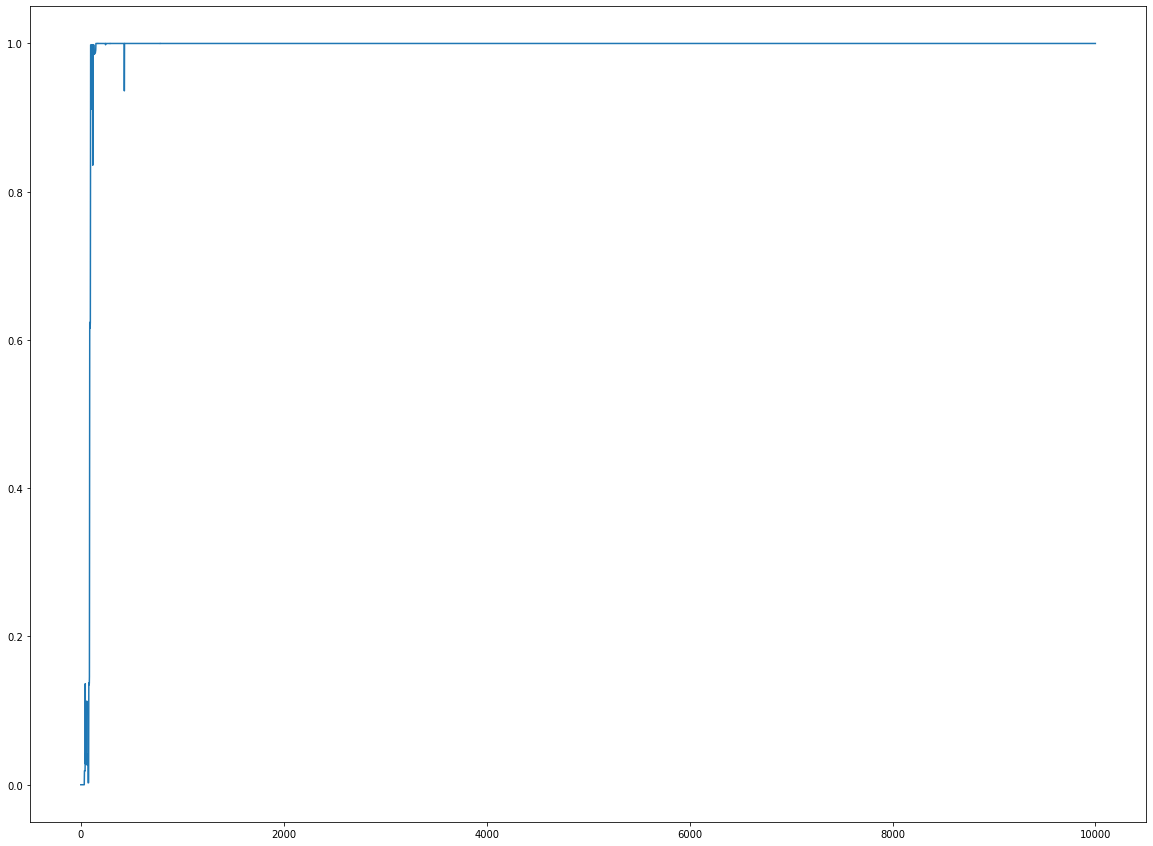

In [52]:
plt.figure(figsize=(20, 15))
plt.plot(np.arange(10000), softmaxes[3])